#### Data Science Technologies

*Notebook by [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*

*License: [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)*  

---

## 1. Similarity Algorithmns

The similarity algorithms are measures of how much alike two data objects are. A similarity algorithm in the machine learning context is a distance with dimensions representing features of the objects. If the distance is small, the features have a high degree of similarity. In contrast, a significant distance will be a low degree of similarity.

Original blog implementing the most popular similarity algorithms at [dataaspirant.com](https://dataaspirant.com/five-most-popular-similarity-measures-implementation-in-python/)

Implementation of 5 different measures between 2 given vectors:
- Euclidean distance
- Manhattan distance
- Minkowski distance
- Cosine similarity
- Jaccard similarity

![](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2015/04/cover_post_final.png?w=1000&ssl=1)

In [1]:
from math import *
from decimal import Decimal

class Similarity():
    
    """ Five similarity measures function """
    
    def euclidean_distance(self,x,y):
        """ return euclidean distance between two lists """
        return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

    def manhattan_distance(self,x,y):
        """ return manhattan distance between two lists """
        return sum(abs(a-b) for a,b in zip(x,y))

    def minkowski_distance(self,x,y,p_value):
        """ return minkowski distance between two lists """
        return self.nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)), p_value)

    def cosine_similarity(self,x,y):
        """ return cosine similarity between two lists """
        numerator = sum(a*b for a,b in zip(x,y))
        denominator = self.square_rooted(x)*self.square_rooted(y)
        return round(numerator/float(denominator),3)

    def jaccard_similarity(self,x,y):
        """ returns the jaccard similarity between two lists """
        intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
        union_cardinality = len(set.union(*[set(x), set(y)]))
        return intersection_cardinality/float(union_cardinality)

Example, given 2 simple vectors

In [2]:
measures = Similarity()

print(measures.jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


## 2. Constructing a Similarity Network from a Dataset

The idea is to compute one similarity alorithm N*N times across the dataset, then take the top M similar records and constructa network

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../datasets/wine_parvus.csv", sep=";")
df.head(2)

,Variety,Variety name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,Babera,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Babera,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [5]:
df = df._get_numeric_data()

In [6]:
measures = Similarity()
pairs = []
for i in range(len(df)):
    for j in range(len(df)):
        pairs.append((i,j,measures.euclidean_distance(df.loc[i],df.loc[j])))
pairs_df = pd.DataFrame(pairs)

In [7]:
pairs_df = pd.DataFrame(pairs)
pairs_df.columns = ["nodeA", "nodeB", "distance"]
pairs_df = pairs_df[pairs_df["distance"] != 0]

In [8]:
list_dfs = []
for i in range(len(df)):
    list_dfs.append(pairs_df[pairs_df["nodeA"] == i].sort_values("distance").head(3))
df_wine_network = pd.concat(list_dfs)

In [9]:
df_wine_network.head()

,nodeA,nodeB,distance
54,0,54,10.390683
45,0,45,22.337166
48,0,48,24.753899
186,1,8,6.736661
187,1,9,7.299932


In [10]:
df_wine_network.to_csv("../datasets/df_wine_network.csv")

load network using NetworkX

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
#Empty graph object
g = nx.Graph()

# Adding all nodes
g.add_nodes_from(list(df_wine_network.nodeA.unique()))

# Adding all edges
edges_list = [(row[1][0],row[1][1],row[1][2]) for row in df_wine_network.iterrows()]
g.add_weighted_edges_from(edges_list)

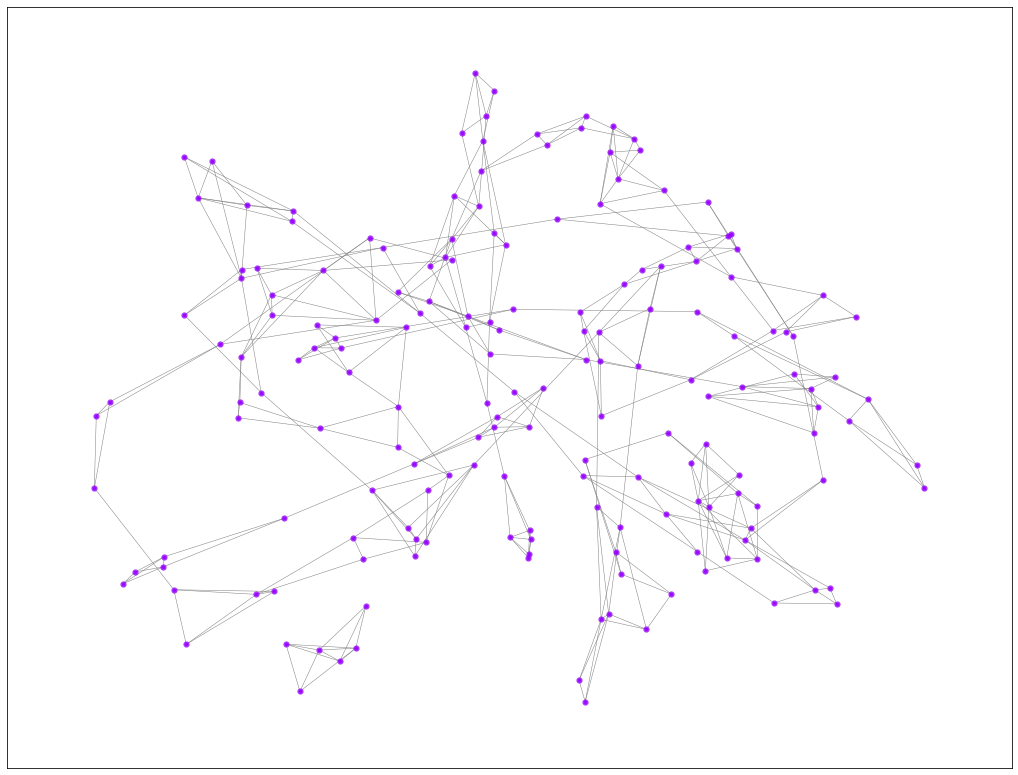

In [13]:
plt.figure(figsize=(18, 14))
pos = nx.spring_layout(g, dim=2, iterations=10, weight='weight', scale=1)
nx.draw_networkx_nodes(g,pos,node_color="#9500ff", node_size=10,linewidths = 3,alpha=0.8)
nx.draw_networkx_edges(g,pos,width=0.5,alpha=1, style='solid',connectionstyle='arc3', edge_color='gray')